In [2]:
import pandas as pd
from pprint import pprint
import sys
import requests
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
low_memory=False
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
csv_file = 'Resources/GenreMovies.csv'
genre_movie_df = pd.read_csv(csv_file)

In [4]:
genre_movie_grouping_df = genre_movie_df.loc[:,['genre','budget','revenue']].groupby('genre').mean().astype(int)

In [5]:
genre_movie_grouping_df

,budget,revenue
genre,,
Action,51798983,165433400
Adventure,84388243,269372290
Animation,48861692,203004753
Comedy,16270915,51570190
Crime,20422056,51184627
Documentary,1018284,3658850
Drama,12183681,38059328
Family,38927486,152352281
Fantasy,47625225,153805006


In [6]:
# Add profit and profit margin columns
genre_movie_grouping_df['profit'] = genre_movie_grouping_df['revenue'] - genre_movie_grouping_df['budget']
genre_movie_grouping_df['profit margin'] = round((genre_movie_grouping_df['profit'] / genre_movie_grouping_df['revenue'])
                                           *100,1)
genre_movie_grouping_df = genre_movie_grouping_df.drop(['TV Movie'])
genre_movie_grouping_df = genre_movie_grouping_df.sort_values('profit margin')
genre_movie_grouping_df

,budget,revenue,profit,profit margin
genre,,,,
Thriller,16937851,42025344,25087493,59.7
Crime,20422056,51184627,30762571,60.1
Music,10529832,26500973,15971141,60.3
War,39160480,106677164,67516684,63.3
Romance,15690150,45387021,29696871,65.4
Western,35400000,108009487,72609487,67.2
Drama,12183681,38059328,25875647,68.0
Comedy,16270915,51570190,35299275,68.4
Action,51798983,165433400,113634417,68.7


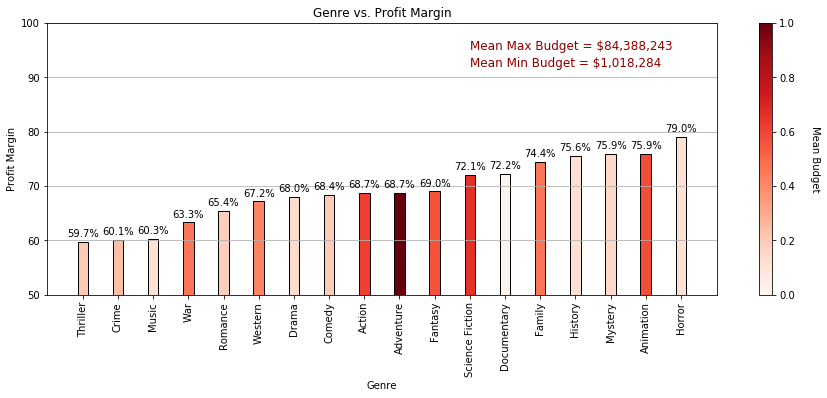

In [7]:
max_budget = max(genre_movie_grouping_df['budget'])
min_budget = min(genre_movie_grouping_df['budget'])
data_color = [ x / max_budget for x in genre_movie_grouping_df['budget']]
fig, ax = plt.subplots(figsize=(15, 5))
my_cmap = plt.cm.get_cmap('Reds')
colors = my_cmap(data_color)
bar_graph = ax.bar(genre_movie_grouping_df.index, genre_movie_grouping_df['profit margin'], width = .3, 
                   edgecolor= 'black', color = colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Mean Budget', rotation=270,labelpad=25)
ax.annotate(f"Mean Max Budget = ${max_budget:,}",('Science Fiction',95),fontsize=12,color="darkred")
ax.annotate(f"Mean Min Budget = ${min_budget:,}",('Science Fiction',92),fontsize=12,color="darkred")
ax.set_ylim(50, 100)
plt.xticks(genre_movie_grouping_df.index, rotation='vertical')
ax.set_title("Genre vs. Profit Margin")
ax.set_ylabel("Profit Margin")
ax.set_xlabel("Genre")
ax.grid(axis='y')
# Cite: funtion autolabel
# https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar_graph)
fig.show()           

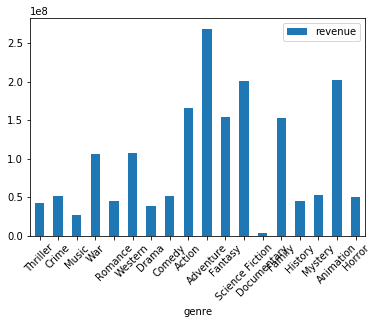

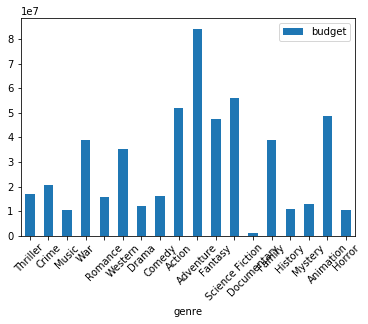

In [15]:
p1 = genre_movie_grouping_df.reset_index().plot.bar(x='genre', y='revenue', rot=45)
p2 = genre_movie_grouping_df.reset_index().plot.bar(x='genre', y='budget', rot=45)
plt.show()